# Setup

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 15.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from scipy import stats
from sklearn import tree, ensemble, model_selection, metrics

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import shap

from datetime import datetime


from scipy.stats import uniform
from sklearn.svm import SVC
import xgboost as xgb

from numpy.random import seed
seed(2022)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/train.csv')
#df = df[['date','retweets', 'likes', 'Software', 'Cloud',
#       'Work', 'Humor', 'Woman', 'Partnership', 'Community', 'Improvement',
#       'symbol', 'marketCap', 'peRatio', 'eps',
#       'sentiment','vol_diff_lead', 'change_lead']]
train

X_train = train.drop("change_lead", axis = 1)
y_train = train["change_lead"]

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/test.csv')
#df = df[['date','retweets', 'likes', 'Software', 'Cloud',
#       'Work', 'Humor', 'Woman', 'Partnership', 'Community', 'Improvement',
#       'symbol', 'marketCap', 'peRatio', 'eps',
#       'sentiment','vol_diff_lead', 'change_lead']]

X_test = test.drop("change_lead", axis = 1)
y_test = test["change_lead"]
y_test

0      1
1      1
2      1
3      1
4      1
      ..
271    0
272    1
273    1
274    1
275    0
Name: change_lead, Length: 276, dtype: int64

In [ ]:
## dataset without outliers

train_wout_outliers = pd.read_csv('/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/train_wout_outliers.csv')
train_wout_outliers

X_train_wout_outliers = train_wout_outliers.drop("change_lead", axis = 1)
y_train_wout_outliers = train_wout_outliers["change_lead"]

In [ ]:
test_wout_outliers = pd.read_csv('/content/drive/MyDrive/Data Modelling/Stock Prices Prediction/test_wout_outliers.csv')

X_test_wout_outliers = test_wout_outliers.drop("change_lead", axis = 1)
y_test_wout_outliers = test_wout_outliers["change_lead"]
y_test_wout_outliers

0      0
1      1
2      1
3      1
4      1
      ..
240    0
241    1
242    0
243    1
244    1
Name: change_lead, Length: 245, dtype: int64

In [ ]:
train_wout_outliers

,retweets,likes,Software,Cloud,Work,Humor,Woman,Partnership,Community,Improvement,eps,sentiment,prev_day_change,change_lead
0,0.000000,0.000044,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1,0
1,0.000340,0.000153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022573,0.50,1,0
2,0.000000,0.000022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.00,0,1
3,0.000226,0.000110,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.022573,1.00,0,1
4,0.000189,0.000121,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022573,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0.014568,0.037947,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.50,0,1
2197,0.008190,0.010369,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022573,0.50,1,1
2198,0.082575,0.281075,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.75,0,0
2199,0.011058,0.031469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.00,1,0


In [ ]:
# Seed value
seed_value= 2022

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# Helper function

In [ ]:
agg_accuracy_score_dict = {}
agg_f1_score_dict={}
agg_roc_auc_dict={}

train_accuracy_score_dict = {}
train_f1_score_dict={}
train_roc_auc_dict={}

val_accuracy_score_dict = {}
val_f1_score_dict={}
val_roc_auc_dict={}

test_accuracy_score_dict = {}
test_f1_score_dict={}
test_roc_auc_dict={}

def evaluation(true, pred, title):
    print("================== Evaluation on {} ==================".format(title))
    # accuracy 
    acc = accuracy_score(true, pred)
    print("accuracy: {}\n".format(acc))
    agg_accuracy_score_dict[title] = acc
    # f1 score
    print("classification report: \n{}\n".format(classification_report(true, pred)))
    print("F1 score: \n{}\n".format(metrics.f1_score(true, pred)))
    f1 = f1_score(true, pred)
    agg_f1_score_dict[title] = f1
    # confusion matrix
    print("Confusion matrix: \n{}\n".format(confusion_matrix(true, pred)))
    # roc auc result
    fpr, tpr, thresholds = roc_curve(true, pred)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC: {}\n".format(roc_auc))
    agg_roc_auc_dict[title] = roc_auc

    precision = metrics.precision_score(true, pred)
    print("Precision: {}\n".format(precision))
    print("================== End of Evaluation on {} ==================".format(title))
    
    if "train dataset" in title:
        train_accuracy_score_dict[title] = acc
        train_f1_score_dict[title] = f1
        train_roc_auc_dict[title] = roc_auc
    elif "test dataset" in title:
        test_accuracy_score_dict[title] = acc
        test_f1_score_dict[title] = f1
        test_roc_auc_dict[title] = roc_auc
    else:
        val_accuracy_score_dict[title] = acc
        val_f1_score_dict[title] = f1
        val_roc_auc_dict[title] = roc_auc

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

# XGBoost model

In [ ]:
xgboost = ensemble.GradientBoostingClassifier(n_estimators=500, random_state=2022, min_samples_leaf=1, min_samples_split=5, max_depth=10)
xgboost.fit(X_train, y_train)

evaluation(y_train, xgboost.predict(X_train), "Default xgboost on train dataset")

y_pred_class = xgboost.predict(X_test)
evaluation(y_test, y_pred_class, "Default xgboost on test dataset")

================== Evaluation on Default xgboost on train dataset ==================
accuracy: 0.9943571140669085

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1193
           1       0.99      0.99      0.99      1288

    accuracy                           0.99      2481
   macro avg       0.99      0.99      0.99      2481
weighted avg       0.99      0.99      0.99      2481


F1 score: 
0.9945652173913043

Confusion matrix: 
[[1186    7]
 [   7 1281]]

ROC AUC: 0.9943488283100695

================== End of Evaluation on Default xgboost on train dataset ==================
================== Evaluation on Default xgboost on test dataset ==================
accuracy: 0.5398550724637681

classification report: 
              precision    recall  f1-score   support

           0       0.60      0.41      0.49       147
           1       0.51      0.68      0.58       129

    accuracy                    

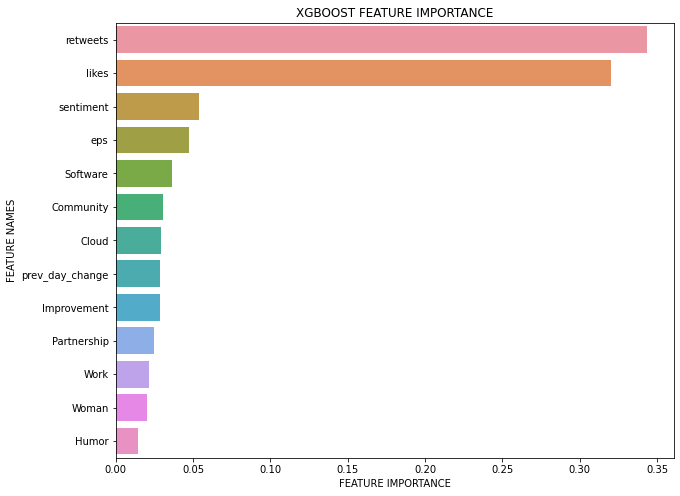

In [ ]:
plot_feature_importance(xgboost.feature_importances_, list(X_train.columns),'XGBOOST ')

# hyperparam tuning

## test 1

In [ ]:
parameters = {
    'max_depth': range(1, 10, 1),
    'n_estimators': range(10, 100, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
xgboost = ensemble.GradientBoostingClassifier(random_state=2022)

In [ ]:
tuned_xg_model = GridSearchCV(
    estimator=xgboost,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

In [ ]:
searched_xg_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}

In [ ]:
searched_xg_model = tuned_xg_model.fit(X_train, y_train)

In [ ]:
y_train_xg_tuned_predict = searched_xg_model.predict(X_train)
evaluation(y_train, y_train_xg_tuned_predict, "Tuned xgboost on train dataset")

y_test_xg_tuned_predict = searched_xg_model.predict(X_test)
evaluation(y_test, y_test_xg_tuned_predict, "Tuned logistic regression on test dataset")

================== Evaluation on Tuned xgboost on train dataset ==================
accuracy: 0.5199516324062878

classification report: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1193
           1       0.52      1.00      0.68      1288

    accuracy                           0.52      2481
   macro avg       0.76      0.50      0.34      2481
weighted avg       0.75      0.52      0.36      2481


F1 score: 
0.6838332890894612

Confusion matrix: 
[[   2 1191]
 [   0 1288]]

ROC AUC: 0.5008382229673093

================== End of Evaluation on Tuned xgboost on train dataset ==================
================== Evaluation on Tuned logistic regression on test dataset ==================
accuracy: 0.42391304347826086

classification report: 
              precision    recall  f1-score   support

           0       0.33      0.08      0.13       147
           1       0.44      0.81      0.57       129

    accuracy             

## test 2

In [ ]:
parameters = {
    'max_depth': range(10, 20, 1),
    'n_estimators': range(60, 200, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
xgboost = ensemble.GradientBoostingClassifier(random_state=2022)

In [ ]:
tuned_xg_model = GridSearchCV(
    estimator=xgboost,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

In [ ]:
searched_xg_model = tuned_xg_model.fit(X_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


In [ ]:
searched_xg_model.best_params_

{'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 60}

best model accuracy with outliers

In [ ]:
y_train_xg_tuned_predict = searched_xg_model.predict(X_train)
evaluation(y_train, y_train_xg_tuned_predict, "Tuned xgboost on train dataset")

y_test_xg_tuned_predict = searched_xg_model.predict(X_test)
evaluation(y_test, y_test_xg_tuned_predict, "Tuned logistic regression on test dataset")

================== Evaluation on Tuned xgboost on train dataset ==================
accuracy: 0.8375654977831519

classification report: 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1193
           1       0.79      0.94      0.86      1288

    accuracy                           0.84      2481
   macro avg       0.85      0.83      0.83      2481
weighted avg       0.85      0.84      0.84      2481


F1 score: 
0.8579485371871695

Confusion matrix: 
[[ 861  332]
 [  71 1217]]

ROC AUC: 0.8332928756254132

Precision: 0.7856681730148483

================== End of Evaluation on Tuned xgboost on train dataset ==================
================== Evaluation on Tuned logistic regression on test dataset ==================
accuracy: 0.48188405797101447

classification report: 
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       147
           1       0.46      0.56      0.50      

# XGBoost model without outliers

In [ ]:
xgboost = ensemble.GradientBoostingClassifier(n_estimators=500, random_state=2022, min_samples_leaf=1, min_samples_split=5, max_depth=10)
xgboost.fit(X_train_wout_outliers, y_train_wout_outliers)

evaluation(y_train_wout_outliers, xgboost.predict(X_train_wout_outliers), "Default xgboost on train dataset")

y_pred_class = xgboost.predict(X_test_wout_outliers)
evaluation(y_test_wout_outliers, y_pred_class, "Default xgboost on test dataset")

================== Evaluation on Default xgboost on train dataset ==================
accuracy: 0.9936392548841436

classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1067
           1       0.99      0.99      0.99      1134

    accuracy                           0.99      2201
   macro avg       0.99      0.99      0.99      2201
weighted avg       0.99      0.99      0.99      2201


F1 score: 
0.9938271604938271

Confusion matrix: 
[[1060    7]
 [   7 1127]]

ROC AUC: 0.9936333553172041

Precision: 0.9938271604938271

================== End of Evaluation on Default xgboost on train dataset ==================
================== Evaluation on Default xgboost on test dataset ==================
accuracy: 0.49387755102040815

classification report: 
              precision    recall  f1-score   support

           0       0.55      0.49      0.52       135
           1       0.44      0.50      0.47       110



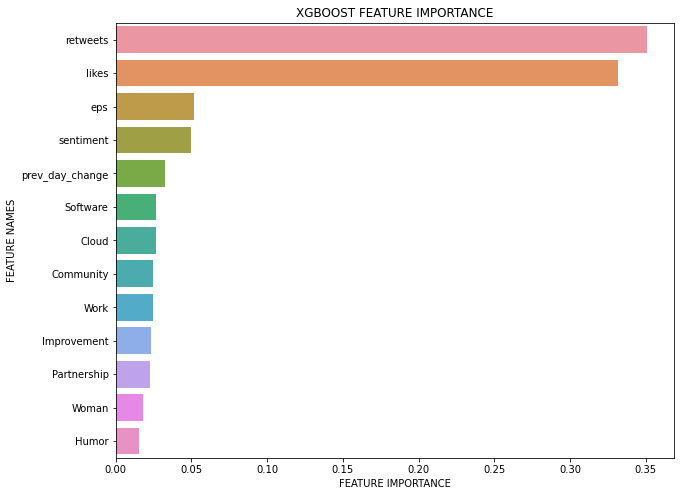

In [ ]:
plot_feature_importance(xgboost.feature_importances_, list(X_train.columns),'XGBOOST ')

# hyperparam tuning without outliers

## test 1

In [ ]:
parameters = {
    'max_depth': range(10, 20, 1),
    'n_estimators': range(30, 100, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
xgboost = ensemble.GradientBoostingClassifier(random_state=2022)

In [ ]:
tuned_xg_model = GridSearchCV(
    estimator=xgboost,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

In [ ]:
searched_xg_model = tuned_xg_model.fit(X_train_wout_outliers, y_train_wout_outliers)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


In [ ]:
searched_xg_model.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 30}

In [ ]:
y_train_xg_tuned_predict = searched_xg_model.predict(X_train_wout_outliers)
evaluation(y_train_wout_outliers, y_train_xg_tuned_predict, "Tuned xgboost on train dataset")

y_test_xg_tuned_predict = searched_xg_model.predict(X_test_wout_outliers)
evaluation(y_test_wout_outliers, y_test_xg_tuned_predict, "Tuned xgboost on test dataset")

================== Evaluation on Tuned xgboost on train dataset ==================
accuracy: 0.7673784643343935

classification report: 
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1067
           1       0.71      0.93      0.80      1134

    accuracy                           0.77      2201
   macro avg       0.80      0.76      0.76      2201
weighted avg       0.80      0.77      0.76      2201


F1 score: 
0.8048780487804879

Confusion matrix: 
[[ 633  434]
 [  78 1056]]

ROC AUC: 0.7622345199664787

Precision: 0.7087248322147651

================== End of Evaluation on Tuned xgboost on train dataset ==================
================== Evaluation on Tuned xgboost on test dataset ==================
accuracy: 0.5346938775510204

classification report: 
              precision    recall  f1-score   support

           0       0.64      0.35      0.45       135
           1       0.49      0.76      0.60       110

    acc

## test 2

In [ ]:
xgboost = ensemble.GradientBoostingClassifier(random_state=2022, max_depth=10, n_estimators=28, learning_rate=0.005)

In [ ]:
searched_xg_model = xgboost.fit(X_train_wout_outliers, y_train_wout_outliers)

best model without outliers

In [ ]:
y_train_xg_tuned_predict = searched_xg_model.predict(X_train_wout_outliers)
evaluation(y_train_wout_outliers, y_train_xg_tuned_predict, "Tuned xgboost on train dataset")

y_test_xg_tuned_predict = searched_xg_model.predict(X_test_wout_outliers)
evaluation(y_test_wout_outliers, y_test_xg_tuned_predict, "Tuned xgboost on test dataset")

================== Evaluation on Tuned xgboost on train dataset ==================
accuracy: 0.6905951840072694

classification report: 
              precision    recall  f1-score   support

           0       0.90      0.41      0.56      1067
           1       0.63      0.96      0.76      1134

    accuracy                           0.69      2201
   macro avg       0.76      0.68      0.66      2201
weighted avg       0.76      0.69      0.66      2201


F1 score: 
0.760968760968761

Confusion matrix: 
[[ 436  631]
 [  50 1084]]

ROC AUC: 0.6822652973855723

Precision: 0.632069970845481

================== End of Evaluation on Tuned xgboost on train dataset ==================
================== Evaluation on Tuned xgboost on test dataset ==================
accuracy: 0.5306122448979592

classification report: 
              precision    recall  f1-score   support

           0       0.70      0.26      0.38       135
           1       0.49      0.86      0.62       110

    accur